In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument.parameter as parameter
import qcodes.instrument_drivers.AlazarTech.ATS9440 as ATSdriver
from qdev_wrappers.alazar_controllers.ATSChannelController import ATSChannelController
from qdev_wrappers.alazar_controllers.alazar_channel import AlazarChannel
#import qcodes.instrument_drivers.AlazarTech.acq_helpers as helpers
from qcodes.station import Station
import logging
logging.basicConfig(level=logging.INFO)
from qcodes.utils.dataset.doNd import do0d
import os
from qcodes import initialise_or_create_database_at, \
    load_or_create_experiment, Measurement, Parameter, \
    Station
import tempfile
from qcodes.instrument.parameter import ManualParameter

In [2]:


db_path = os.path.join(tempfile.gettempdir(),
                       'data_access_example.db')
initialise_or_create_database_at(db_path)

experiment = load_or_create_experiment(
    experiment_name='alazar',
    sample_name='alazar-sample')



In [3]:
ats_inst = ATSdriver.AlazarTech_ATS9440(name='Alazar')
# Print all information about this Alazar card
ats_inst.get_idn()

{'firmware': '7.06',
 'model': 'ATS9440',
 'max_samples': 134217728,
 'bits_per_sample': 14,
 'serial': '941144',
 'vendor': 'AlazarTech',
 'CPLD_version': '15.3',
 'driver_version': '7.3.0',
 'SDK_version': '7.3.0',
 'latest_cal_date': '16-06-20',
 'memory_size': '134217728',
 'asopc_type': 1174905920,
 'pcie_link_speed': '0.25GB/s',
 'pcie_link_width': '4'}

In [5]:
with ats_inst.syncing():
    ats_inst.clock_source('INTERNAL_CLOCK')
    ats_inst.sample_rate(1_000_000)
    ats_inst.clock_edge('CLOCK_EDGE_RISING')
    ats_inst.decimation(1)
    ats_inst.coupling1('DC')
    ats_inst.coupling2('DC')
    ats_inst.channel_range1(.4)
    ats_inst.channel_range2(.4)
    ats_inst.impedance1(50)
    ats_inst.impedance2(50)
    ats_inst.trigger_operation('TRIG_ENGINE_OP_J')
    ats_inst.trigger_engine1('TRIG_ENGINE_J')
    ats_inst.trigger_source1('EXTERNAL')
    ats_inst.trigger_slope1('TRIG_SLOPE_POSITIVE')
    ats_inst.trigger_level1(160)
    ats_inst.trigger_engine2('TRIG_ENGINE_K')
    ats_inst.trigger_source2('DISABLE')
    ats_inst.trigger_slope2('TRIG_SLOPE_POSITIVE')
    ats_inst.trigger_level2(128)
    ats_inst.external_trigger_coupling('DC')
    ats_inst.external_trigger_range('ETR_5V')
    ats_inst.trigger_delay(0)
    ats_inst.aux_io_mode('AUX_IN_AUXILIARY') # AUX_IN_TRIGGER_ENABLE for seq mode on
    ats_inst.aux_io_param('NONE')
    ats_inst.timeout_ticks(1)

In [6]:
myctrl = ATSChannelController(name='my_controller', alazar_name='Alazar')

In [7]:
station = qc.Station(ats_inst, myctrl)

In [8]:
myctrl.int_delay(2e-7)
myctrl.int_time(2e-7)
print(myctrl.samples_per_record())

INFO:qdev_wrappers.alazar_controllers.ATSChannelController:need 0.19999999999999998 samples round up to 256
INFO:qdev_wrappers.alazar_controllers.ATSChannelController:need 0.39999999999999997 samples round up to 256


256


In [9]:
myctrl.channels

ChannelList(<ATSChannelController: my_controller>, AlazarChannel, [])

In [10]:
chan1 = AlazarChannel(myctrl, 'mychan', demod=False, integrate_samples=False)
myctrl.channels.append(chan1)

INFO:qcodes.dataset.measurements:Registered my_controller_mychan_time in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_mychan_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 4 to 1601975312.2268498
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd2b5f53. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 1000, 'buffers_per_acquisition': 1, 'allocated_buffers': 1}


Starting experimental run with id: 4. 


INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd2b5f53. 


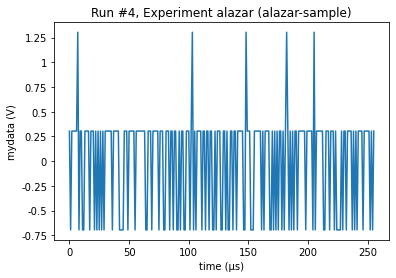

In [11]:


chan1.num_averages(1000)

chan1.alazar_channel('A')
chan1.prepare_channel()

# Measure this 
data1 = do0d(chan1.data)



INFO:qcodes.dataset.measurements:Registered my_controller_mychan_time in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_mychan_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 5 to 1601975372.5934715
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd2c4b22. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 1000, 'buffers_per_acquisition': 1, 'allocated_buffers': 1}


Starting experimental run with id: 5. 


INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd2c4b22. 


Wall time: 816 ms


(results #5@C:\Users\WMIAdmin\AppData\Local\Temp\data_access_example.db
 ----------------------------------------------------------------------
 my_controller_mychan_time - array
 my_controller_mychan_data - array,
 [<AxesSubplot:title={'center':'Run #5, Experiment alazar (alazar-sample)'}, xlabel='time (μs)', ylabel='mydata (V)'>],
 [None])

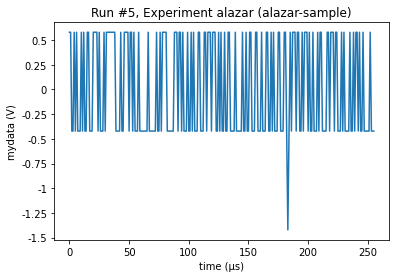

In [12]:
%%time
do0d(chan1.data)

In [15]:
chan2 = AlazarChannel(myctrl, 'myrecchan', demod=False, average_records=False)
myctrl.channels.append(chan2)

INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_records in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 7 to 1601975483.5278735
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd2dfc78. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 55, 'buffers_per_acquisition': 100, 'allocated_buffers': 4}


Starting experimental run with id: 7. 


INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd2dfc78. 


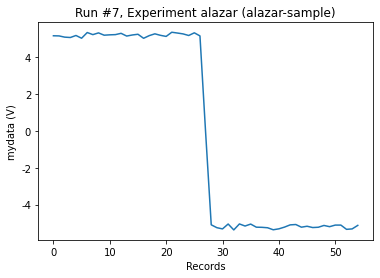

In [16]:
chan2.num_averages(100)
chan2.records_per_buffer(55)
chan2.alazar_channel('A')

chan2.prepare_channel()

# Measure this 
data2 = do0d(myctrl.channels[-1].data)

In [17]:


chan2d = AlazarChannel(myctrl, 'myrecchan_D', demod=True, average_records=False)
myctrl.channels.append(chan2d)



In [18]:


print(myctrl.int_delay())
print(myctrl.int_time())



2e-07
2e-07


In [19]:
myctrl.int_time.cache.get()

2e-07

In [20]:
chan2d.alazar_channel('A')
chan2d.demod_freq(1e6)
chan2d.demod_type('magnitude')

INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_D_records in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_D_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 8 to 1601975666.9455895
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd30c8f2. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 55, 'buffers_per_acquisition': 100, 'allocated_buffers': 4}


Starting experimental run with id: 8. 


C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd30c8f2. 
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:702: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:705: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:


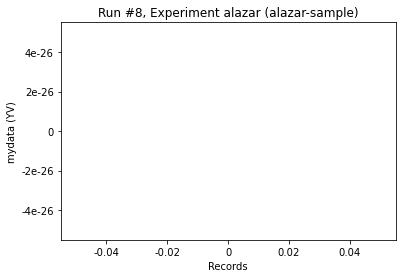

In [21]:


chan2d.num_averages(100)
chan2d.records_per_buffer(55)
chan2d.alazar_channel('A')

chan2d.prepare_channel()

# Measure this 
data2d = do0d(myctrl.channels[-1].data)



In [22]:
myctrl.channels

ChannelList(<ATSChannelController: my_controller>, AlazarChannel, [<AlazarChannel: my_controller_mychan of ATSChannelController: my_controller>, <AlazarChannel: my_controller_mychan_demod_1 of ATSChannelController: my_controller>, <AlazarChannel: my_controller_myrecchan of ATSChannelController: my_controller>, <AlazarChannel: my_controller_myrecchan_D of ATSChannelController: my_controller>])

In [23]:
myctrl.channels[-2:]

ChannelList(<ATSChannelController: my_controller>, AlazarChannel, (<AlazarChannel: my_controller_myrecchan of ATSChannelController: my_controller>, <AlazarChannel: my_controller_myrecchan_D of ATSChannelController: my_controller>))

INFO:qcodes.dataset.measurements:Registered my_controller_records in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_records in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_data in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_D_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 9 to 1601975688.8103032
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd311e5b. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 55, 'buffers_per_acquisition': 100, 'allocated_buffers': 4}


Starting experimental run with id: 9. 


C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd311e5b. 
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:702: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:705: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:


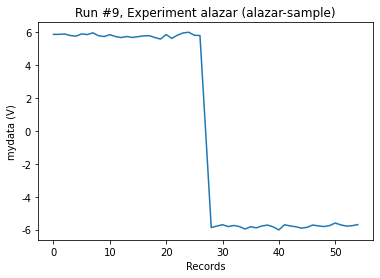

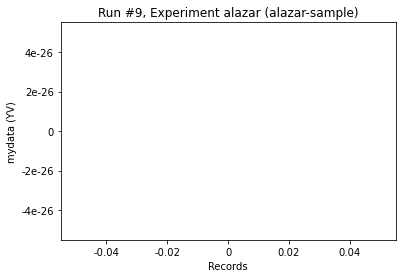

In [24]:
data = do0d(myctrl.channels[-2:].data)

In [25]:
chan3 = AlazarChannel(myctrl, 'myrecchan', demod=False, average_buffers=False)
myctrl.channels.append(chan3)

INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_buffers in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 10 to 1601975751.9802148
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd32151d. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 100, 'buffers_per_acquisition': 100, 'allocated_buffers': 4}


Starting experimental run with id: 10. 


INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd32151d. 


10000


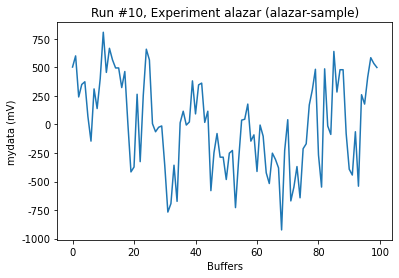

In [27]:


chan3.num_averages(100)
chan3.buffers_per_acquisition(100)
chan3.alazar_channel('A')
ats_inst.buffer_timeout.set(10000)
chan3.prepare_channel()

# Measure this 
data3 = do0d(chan3.data)
print(ats_inst.buffer_timeout())



In [28]:
chan3d = AlazarChannel(myctrl, 'myrecchan_d', demod=True, average_buffers=False)
myctrl.channels.append(chan3d)

INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_d_buffers in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_d_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 11 to 1601975780.7555273
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd328594. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 100, 'buffers_per_acquisition': 100, 'allocated_buffers': 4}


Starting experimental run with id: 11. 


C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd328594. 
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:702: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:705: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:


10000


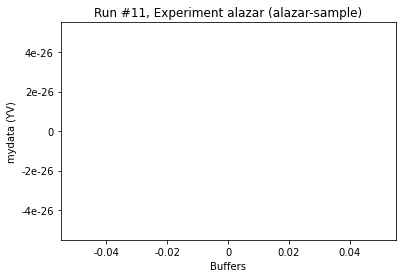

In [30]:
chan3d.num_averages(100)
chan3d.buffers_per_acquisition(100)
chan3d.alazar_channel('A')
chan3d.demod_freq(2e6)
chan3d.demod_type('magnitude')
ats_inst.buffer_timeout.set(10000)
chan3d.prepare_channel()

# Measure this 
data3 = do0d(chan3d.data)
print(ats_inst.buffer_timeout())

INFO:qcodes.dataset.measurements:Registered my_controller_buffers in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_buffers in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_data in the Measurement.
INFO:qcodes.dataset.measurements:Registered my_controller_myrecchan_d_data in the Measurement.
INFO:qcodes.dataset.sqlite.queries:Set the run_timestamp of run_id 12 to 1601975790.6925883
INFO:qcodes.dataset.measurements:Starting measurement with guid: aaaaaaaa-0000-0000-0000-0174fd32ac45. 
INFO:qcodes.dataset.measurements:Using background writing: False
INFO:qdev_wrappers.alazar_controllers.alazar_multidim_parameters:calling acquire with {'samples_per_record': 256, 'records_per_buffer': 100, 'buffers_per_acquisition': 100, 'allocated_buffers': 4}


Starting experimental run with id: 12. 


C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\WMIAdmin\anaconda3\envs\qcodes\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
INFO:qcodes.dataset.measurements:Finished measurement with guid: aaaaaaaa-0000-0000-0000-0174fd32ac45. 
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:702: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\WMIAdmin\Qcodes\qcodes\dataset\plotting.py:705: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:


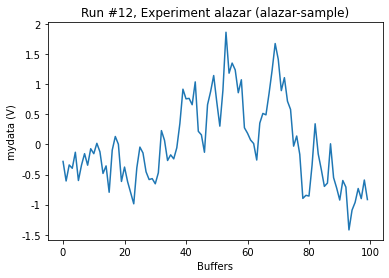

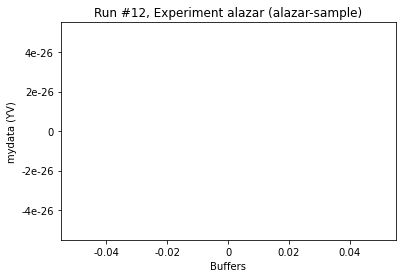

In [31]:
data = do0d(myctrl.channels[-2:].data)